In [17]:
!pip install --upgrade seaborn==0.9.0
!pip install obspy

Requirement already up-to-date: seaborn==0.9.0 in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
from obspy import read,Stream, Trace
from obspy.core import UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import math as M
from matplotlib import mlab
from matplotlib.colors import Normalize
import requests
from lxml import html
from scipy import signal
import matplotlib.colors as colors
import datetime


import json
import requests
import pandas as pd
import datetime
import pytz
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

In [0]:
USERNAME ='OOIAPI-OFE8MCFYP2K2SU'
TOKEN= 'YOS4LPN79YC'

In [0]:
data_request_url = ['https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE02SHSM/SBD11/06-METBKA000/telemetered/metbk_a_dcl_instrument?beginDT=2018-04-03T00:00:00.000Z&endDT=2019-04-03T00:00:00.000Z&limit=1000',
                   'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE04OSSM/SBD11/06-METBKA000/telemetered/metbk_a_dcl_instrument?beginDT=2018-04-03T18:35:53.000Z&endDT=2019-04-03T18:35:53.000Z&limit=1000']

In [0]:
# Storing values for velocity, precipitation and time
OSSM_time = []
OSSM_velocity = []
OSSM_precipitation = []

OOSM_time = []
OOSM_velocity = []
OOSM_precipitation = []

In [0]:
# UTC time to Pacific time convertion

ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()
pst_delta = 8*3600

def ntp_seconds_to_datetime(ntp_seconds):
    timestamp = datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)
    utc_timezone = pytz.timezone('UTC')
    pst_timezone = pytz.timezone('US/Pacific')
    time = utc_timezone.localize(timestamp).astimezone(pst_timezone)
    return time

In [0]:
def Average(time,velocity,precipitation):
    
    May_velocity = []
    June_velocity = []
    July_velocity = []
    Aug_velocity = []
    Sept_velocity = []
    Oct_velocity = []
    Nov_velocity = []
    Dec_velocity = []
    Jan_velocity = []
    Feb_velocity = []
    March_velocity = []
    April_velocity = []

    April_precipitation = []
    May_precipitation = []
    June_precipitation = []
    July_precipitation = []
    Aug_precipitation = []
    Sept_precipitation = []
    Oct_precipitation = []
    Nov_precipitation = []
    Dec_precipitation = []
    Jan_precipitation = []
    Feb_precipitation = []
    March_precipitation = []
    
    
    avg_velocity = []
    avg_precipitation = []
    Months = ['May',
              'June',
              'July',
              'August',
              'September',
              'October',
              'November',
              'December',
              'January',
              'February',
              'March',
              'April',]

    for i in range(len(time)):
        if i <= int(round(len(time)/12)):
            April_velocity.append(velocity[i])
            April_precipitation.append(precipitation[i])
        elif i > int(round(len(time)/12)) and i <= 2*int(round(len(time)/12)):
            May_velocity.append(velocity[i])
            May_precipitation.append(precipitation[i])
        elif i > 2*int(round(len(time)/12)) and i <= 3*int(round(len(time)/12)):
            June_velocity.append(velocity[i])
            June_precipitation.append(precipitation[i])
        elif i > 3*int(round(len(time)/12)) and i <= 4*int(round(len(time)/12)):
            July_velocity.append(velocity[i])
            July_precipitation.append(precipitation[i])
        elif i > 4*int(round(len(time)/12)) and i <= 5*int(round(len(time)/12)):
            Aug_velocity.append(velocity[i])
            Aug_precipitation.append(precipitation[i])
        elif i > 5*int(round(len(time)/12)) and i <= 6*int(round(len(time)/12)):
            Sept_velocity.append(velocity[i])
            Sept_precipitation.append(precipitation[i])
        elif i > 6*int(round(len(time)/12)) and i <= 7*int(round(len(time)/12)):
            Oct_velocity.append(velocity[i])
            Oct_precipitation.append(precipitation[i])
        elif i > 7*int(round(len(time)/12)) and i <= 8*int(round(len(time)/12)):
            Nov_velocity.append(velocity[i])
            Nov_precipitation.append(precipitation[i])
        elif i > 8*int(round(len(time)/12)) and i <= 9*int(round(len(time)/12)):
            Dec_velocity.append(velocity[i])
            Dec_precipitation.append(precipitation[i])
        elif i > 9*int(round(len(time)/12)) and i <= 10*int(round(len(time)/12)):
            Jan_velocity.append(velocity[i])
            Jan_precipitation.append(precipitation[i])
        elif i > 10*int(round(len(time)/12)) and i <= 11*int(round(len(time)/12)):
            Feb_velocity.append(velocity[i])
            Feb_precipitation.append(precipitation[i])
        elif i > 11*int(round(len(time)/12)):
            March_velocity.append(velocity[i])
            March_precipitation.append(precipitation[i])

    avg_velocity.append(np.mean(April_velocity))
    avg_velocity.append(np.mean(May_velocity))
    avg_velocity.append(np.mean(June_velocity))
    avg_velocity.append(np.mean(July_velocity))
    avg_velocity.append(np.mean(Aug_velocity))
    avg_velocity.append(np.mean(Sept_velocity))
    avg_velocity.append(np.mean(Oct_velocity))
    avg_velocity.append(np.mean(Nov_velocity))
    avg_velocity.append(np.mean(Dec_velocity))
    avg_velocity.append(np.mean(Jan_velocity))
    avg_velocity.append(np.mean(Feb_velocity))
    avg_velocity.append(np.mean(March_velocity))
   
    avg_precipitation.append(np.mean(April_precipitation))
    avg_precipitation.append(np.mean(May_precipitation))
    avg_precipitation.append(np.mean(June_precipitation))
    avg_precipitation.append(np.mean(July_precipitation))
    avg_precipitation.append(np.mean(Aug_precipitation))
    avg_precipitation.append(np.mean(Sept_precipitation))
    avg_precipitation.append(np.mean(Oct_precipitation))
    avg_precipitation.append(np.mean(Nov_precipitation))
    avg_precipitation.append(np.mean(Dec_precipitation))
    avg_precipitation.append(np.mean(Jan_precipitation))
    avg_precipitation.append(np.mean(Feb_precipitation))
    avg_precipitation.append(np.mean(March_precipitation))
     
    
    return Months,avg_velocity,avg_precipitation

Oregon Shelf Surface Mooring - Surface Buoy


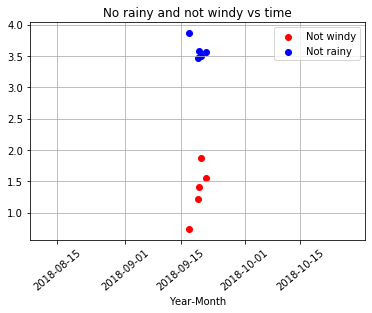

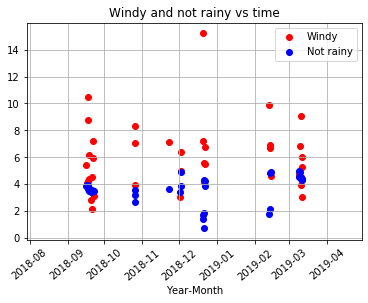

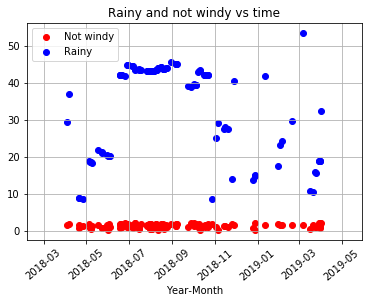

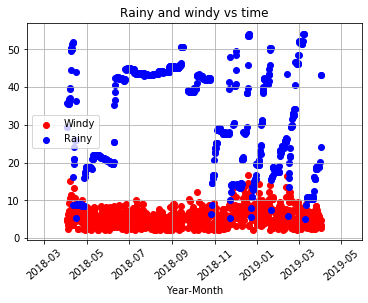

Oregon Offshore Surface Mooring - Surface Buoy


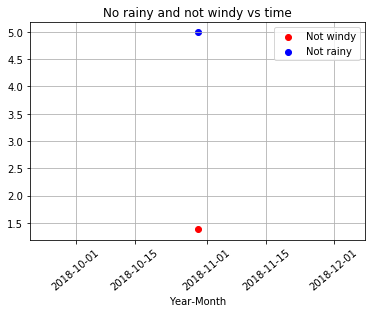

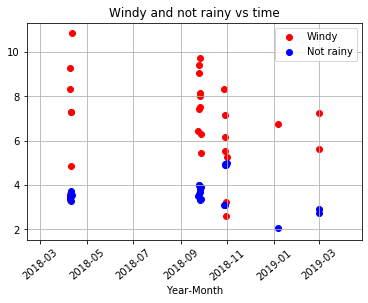

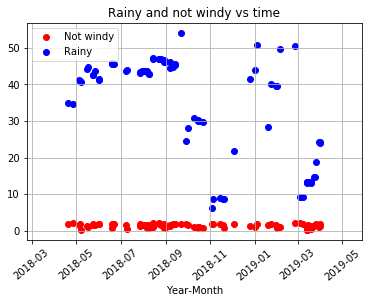

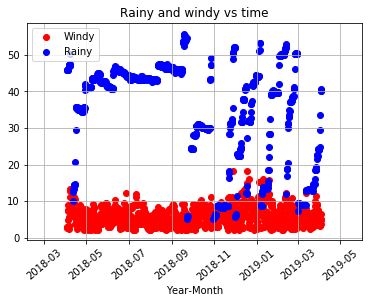

In [11]:
 
for i in range(len(data_request_url)):
    data_request = requests.get(data_request_url[i], auth=(USERNAME, TOKEN))
    data = data_request.json()
    time = []
    velocity = []
    precipitation = []
    if i == 0:
        print("Oregon Shelf Surface Mooring - Surface Buoy")
    elif i==1:
        print("Oregon Offshore Surface Mooring - Surface Buoy")
    
    for j in range(len(data)):
        time.append(ntp_seconds_to_datetime(data[j]['time']))
        
         #resultant velocity
        resultant_velocity = np.sqrt((np.square(data[j]['northward_wind_velocity']))+(np.square(data[j]['eastward_wind_velocity'])))
        velocity.append(resultant_velocity)
        precipitation.append(data[j]['precipitation'])
        if i == 0:
            OSSM_time.append(ntp_seconds_to_datetime(data[j]['time']))
            OSSM_velocity.append(resultant_velocity)
            OSSM_precipitation.append(data[j]['precipitation'])
          
        elif i == 1:
            OOSM_time.append(ntp_seconds_to_datetime(data[j]['time']))
            OOSM_velocity.append(resultant_velocity)
            OOSM_precipitation.append(data[j]['precipitation'])
            
    
    from numpy import *
    velocity = np.asarray(velocity)
    velocity[isnan(velocity)] = 0
    
    #Case 1: No rainy and not windy
    time1 = []
    velocity1 = []
    precipitation1 = []
     
    #Case 2: Windy and not rainy
    time2 = []
    velocity2 = []
    precipitation2 = []
    
    #Case 3: Rainy and not windy
    time3 = []
    velocity3 = []
    precipitation3 = []
    
    #Case 4: Rainy and Windy
    time4 = []
    velocity4 = []
    precipitation4 = []
    
    for i in range(len(time)):
        if velocity[i] < 2 and precipitation[i] < 5:
            #Case 1: No rainy and not windy
            time1.append(time[i])
            velocity1.append(velocity[i])
            precipitation1.append(precipitation[i])
        elif velocity[i] >= 2 and precipitation[i] < 5:
            #Case 2: Windy and not rainy
            time2.append(time[i])
            velocity2.append(velocity[i])
            precipitation2.append(precipitation[i])
        elif velocity[i] < 2 and precipitation[i] >= 5:
            #Case 3: Rainy and not windy
            time3.append(time[i])
            velocity3.append(velocity[i])
            precipitation3.append(precipitation[i])
        elif velocity[i] >= 2 and precipitation[i] >= 5:
            #Case 4: Rainy and Windy
            time4.append(time[i])
            velocity4.append(velocity[i])
            precipitation4.append(precipitation[i])
    
    # not windy not rainy vs time
    plt.scatter(time1,velocity1,color = 'Red',label = 'Not windy')
    plt.scatter(time1,precipitation1,color = 'blue',label='Not rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('No rainy and not windy vs time')
    plt.grid(True)
    plt.show()
   
    
    # not rainy and windy vs time
    plt.scatter(time2,velocity2,color = 'Red',label='Windy')
    plt.scatter(time2,precipitation2,color = 'blue',label = 'Not rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Windy and not rainy vs time')
    plt.grid(True)
    plt.show()
    
    # Rainy and not windy vs time
    plt.scatter(time3,velocity3,color = 'Red',label='Not windy')
    plt.scatter(time3,precipitation3,color = 'blue',label = 'Rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Rainy and not windy vs time')
    plt.grid(True)
    plt.show()
    
    # rainy and windy vs time
    plt.scatter(time4,velocity4,color = 'Red', label='Windy')
    plt.scatter(time4,precipitation4,color = 'blue',label = 'Rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Rainy and windy vs time')
    plt.grid(True)
    plt.show()
    
    

## **PART I : WIND AND RAIN NOISE**

### Oregon Shelf Cabled Bonthic Experiment Package

No wind No rain

In [0]:
data_url_1 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2018/11/16/OO-HYEA2--YDH-2018-11-16T13:10:00.000000.mseed'
st1 = read(data_url_1)
fs1 = st[0].stats.sampling_rate

In [83]:
fs1 = st1[0].stats.sampling_rate
print(fs1)



64000.0


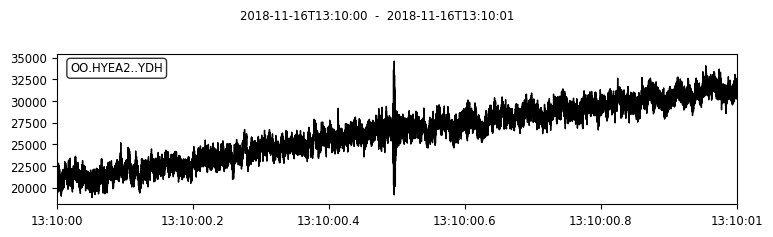

(0, 15000)

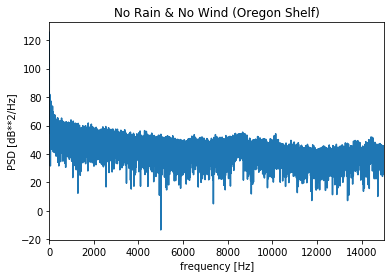

In [124]:
#st1[0].plot()


# slicing time
t_start1 = st1[0].stats.starttime 
t_end1 = st1[0].stats.starttime + 1  # one sec
sliced1 = st1.slice(t_start1, t_end1)
sliced1.plot()

from scipy.fftpack import fft
x1 = (sliced1[0].data)*np.hanning(len(sliced1[0].data))
xfft1 = 2*np.square(fft(x1,64000))/(len(x1)*fs1) 
fre1 = np.linspace(1,fs1,64000)
data_db1 = 10*np.log10(np.abs(xfft1))+169-128.9
plt.plot(fre1[0:32000], data_db1[0:32000],label='PSD')
plt.title('No Rain & No Wind (Oregon Shelf)')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

Windy and No rain 2018-12-01 @time 00:15:14.9

In [7]:
data_url_2 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2018/12/01/OO-HYEA2--YDH-2018-12-01T00:15:14.913000.mseed'
st2 = read(data_url_2)
st2[0].stats


         network: OO
         station: HYEA2
        location: 
         channel: YDH
       starttime: 2018-12-01T00:15:14.913000Z
         endtime: 2018-12-01T00:20:00.001000Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 18245633
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 9800, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 40140800})

64000.0


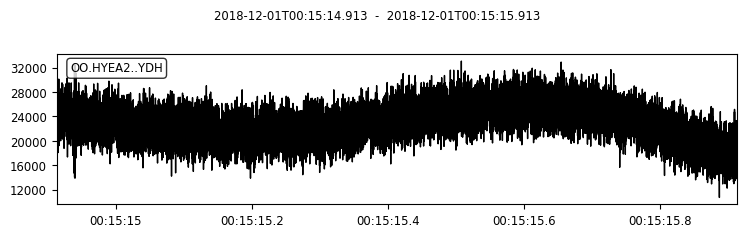

(0, 15000)

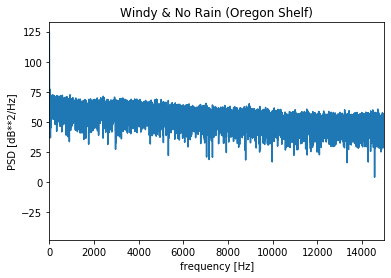

In [123]:
fs2 = st2[0].stats.sampling_rate
print(fs2)

#st2[0].plot()

# slicing time
t_start2 = st2[0].stats.starttime 
t_end2 = st2[0].stats.starttime + 1
sliced2 = st2.slice(t_start2, t_end2)
sliced2.plot()


from scipy.fftpack import fft
x2 = (sliced2[0].data)*np.hanning(len(sliced2[0].data))
xfft2 = 2*np.square(fft(x2,64000))/(len(x2)*fs2)
fre2 = np.linspace(1,fs2,64000)
data_db2 = 10*np.log10(np.abs(xfft2))+169-128.9
plt.plot(fre2[0:32000], data_db2[0:32000],label='PSD')
plt.title('Windy & No Rain (Oregon Shelf)')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

Rainy and No wind

In [14]:
data_url_3 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2019/03/01/OO-HYEA2--YDH-2019-03-01T00:25:00.000015.mseed'
st3 = read(data_url_3)
st3[0].stats

fs3 = st3[0].stats.sampling_rate
print(fs3)

64000.0


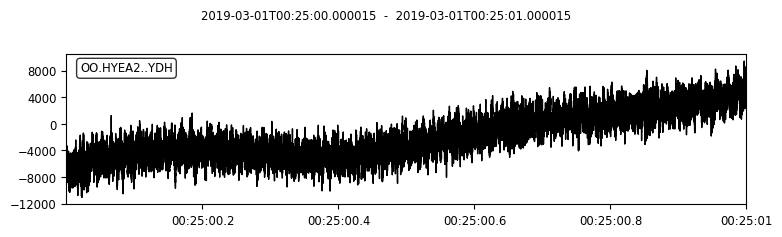

(0, 15000)

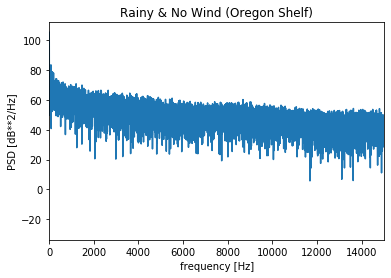

In [15]:
#st3[0].plot() #all 5 mins

# slicing time
t_start3 = st3[0].stats.starttime 
t_end3 = st3[0].stats.starttime + 1
sliced3 = st3.slice(t_start3, t_end3)
sliced3.plot()

from scipy.fftpack import fft
x3 = (sliced3[0].data)*np.hanning(len(sliced3[0].data))
xfft3 = 2*np.square(fft(x3,64000))/(len(x3)*fs3)
fre3 = np.linspace(1,fs3,64000)
data_db3 = 10*np.log10(np.abs(xfft3))+169-128.9
plt.plot(fre3[0:32000], data_db3[0:32000],label='PSD')
plt.title('Rainy & No Wind (Oregon Shelf)')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

Rainy and Windy

In [91]:

data_url_4 = 'https://rawdata.oceanobservatories.org/files/CE02SHBP/LJ01D/11-HYDBBA106/2018/11/16/OO-HYEA2--YDH-2018-11-16T13:05:00.612250.mseed'
st4 = read(data_url_4)
st4[0].stats

fs4 = st4[0].stats.sampling_rate
print(fs4)

64000.0


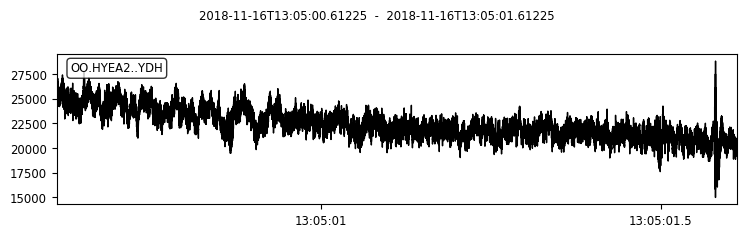

(0, 15000)

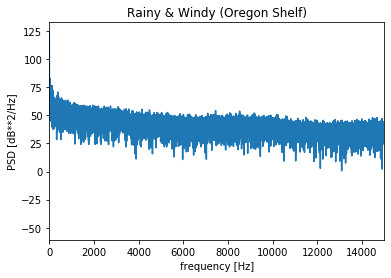

In [117]:

#st4[0].plot()

# slicing time
t_start4 = st4[0].stats.starttime 
t_end4 = st4[0].stats.starttime + 1
sliced4 = st4.slice(t_start4, t_end4)
sliced4.plot()

from scipy.fftpack import fft
x4 = (sliced4[0].data)*np.hanning(len(sliced4[0].data))
xfft4 = 2*np.square(fft(x4,64000))/(len(x4)*fs4)
fre4 = np.linspace(1,fs4,64000)
data_db4 = 10*np.log10(np.abs(xfft4))+169-128.9
plt.plot(fre4[0:32000], data_db4[0:32000],label='PSD')
plt.title('Rainy & Windy (Oregon Shelf)')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

### Oregon Offshore Cabled Bonthic Experiment Package 

No rain and no wind

In [102]:
data_url_5 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2018/11/16/OO-HYEA1--YDH-2018-11-16T13:10:00.000015.mseed'
st5 = read(data_url_5)
st5[0].stats

st5 = read(data_url_5)
st5[0].stats

fs5 = st5[0].stats.sampling_rate
print(fs5)

64000.0


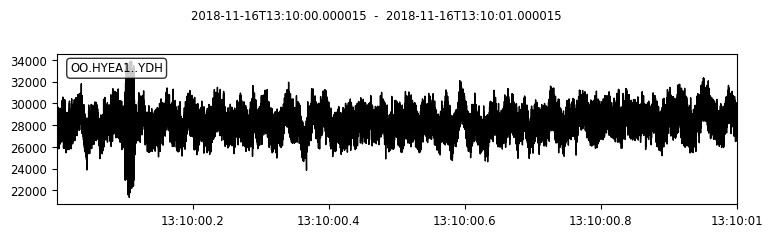

(0, 15000)

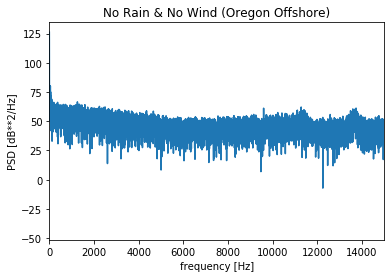

In [116]:
#st5[0].plot()

# slicing time
t_start5 = st5[0].stats.starttime 
t_end5 = st5[0].stats.starttime + 1
sliced5 = st5.slice(t_start5, t_end5)
sliced5.plot()

from scipy.fftpack import fft
x5 = (sliced5[0].data)*np.hanning(len(sliced5[0].data))
xfft5 = 2*np.square(fft(x5,64000))/(len(x5)*fs5)
fre5 = np.linspace(1,fs5,64000)
data_db5 = 10*np.log10(np.abs(xfft5))+169-128.9
plt.plot(fre5[0:32000], data_db5[0:32000],label='PSD')
plt.title('No Rain & No Wind (Oregon Offshore)')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

Windy and No rain

In [106]:
data_url_6 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/03/01/OO-HYEA1--YDH-2019-03-01T00:00:00.000015.mseed'

st6 = read(data_url_6)
st6[0].stats

fs6 = st6[0].stats.sampling_rate
print(fs6)

64000.0


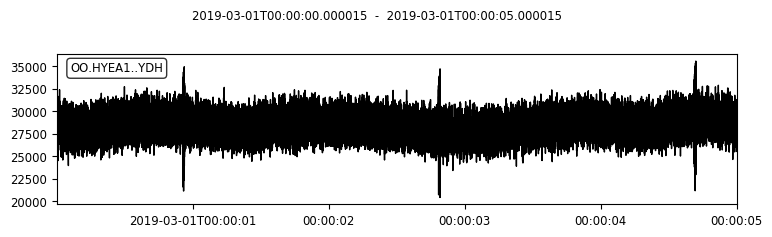

(0, 15000)

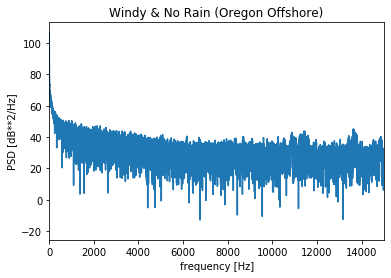

In [115]:
#st6[0].plot()

# slicing time
t_start6 = st6[0].stats.starttime 
t_end6 = st6[0].stats.starttime + 5
sliced6 = st6.slice(t_start6, t_end6)
sliced6.plot()

from scipy.fftpack import fft
x6 = (sliced6[0].data)*np.hanning(len(sliced6[0].data))
xfft6 = 2*np.square(fft(x6,64000))/(len(x6)*fs6)
fre6 = np.linspace(1,fs6,64000)
data_db6 = 10*np.log10(np.abs(xfft6))+169-128.9
plt.plot(fre6[0:32000], data_db6[0:32000],label='PSD')
plt.title('Windy & No Rain (Oregon Offshore)')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

Rainy and No wind

In [108]:
data_url_7 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2018/09/01/OO-HYEA1--YDH-2018-09-01T00:00:00.000015.mseed'

st7 = read(data_url_7)
st7[0].stats

fs7 = st7[0].stats.sampling_rate
print(fs7)

64000.0


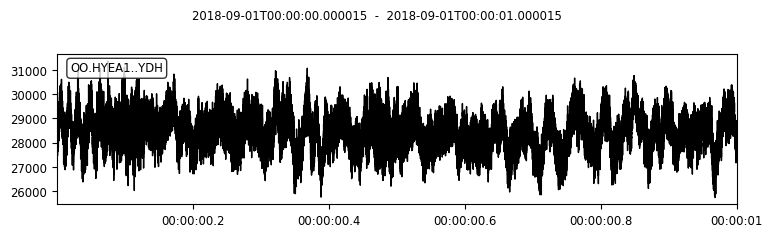

(0, 15000)

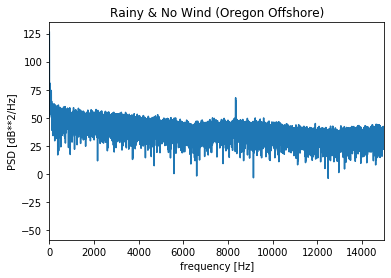

In [114]:
#st7[0].plot()

# slicing time
t_start7 = st7[0].stats.starttime 
t_end7 = st7[0].stats.starttime + 1
sliced7 = st7.slice(t_start7, t_end7)
sliced7.plot()

from scipy.fftpack import fft
x7 = (sliced7[0].data)*np.hanning(len(sliced7[0].data))
xfft7 = 2*np.square(fft(x7,64000))/(len(x7)*fs7)
fre7 = np.linspace(1,fs7,64000)
data_db7 = 10*np.log10(np.abs(xfft7))+169-128.9
plt.plot(fre7[0:32000], data_db7[0:32000],label='PSD')
plt.title('Rainy & No Wind (Oregon Offshore)')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

Rainy and Windy

In [110]:
data_url_8 = 'https://rawdata.oceanobservatories.org/files/CE04OSBP/LJ01C/11-HYDBBA105/2019/01/01/OO-HYEA1--YDH-2019-01-01T02:15:23.582250.mseed'

st8 = read(data_url_8)
st8[0].stats


fs8 = st8[0].stats.sampling_rate
print(fs8)

64000.0


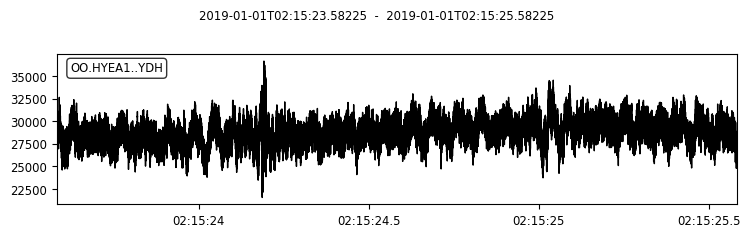

(0, 15000)

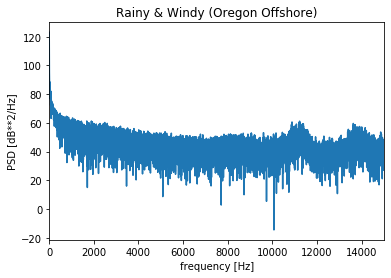

In [113]:

#st8[0].plot()

# slicing time
t_start8 = st8[0].stats.starttime 
t_end8 = st8[0].stats.starttime + 2
sliced8 = st8.slice(t_start8, t_end8)
sliced8.plot()

from scipy.fftpack import fft
x8 = (sliced8[0].data)*np.hanning(len(sliced8[0].data))
xfft8 = 2*np.square(fft(x8,64000))/(len(x8)*fs8)
fre8 = np.linspace(1,fs8,64000)
data_db8 = 10*np.log10(np.abs(xfft8))+169-128.9
plt.plot(fre8[0:32000], data_db8[0:32000],label='PSD')
plt.title('Rainy & Windy (Oregon Offshore)')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB**2/Hz]')
plt.xlim(0,15000)

## **Part 2. Airgun, Marine Mammals, Eartquake/Volcano Noise**

### **Airgun**

In [125]:
data_url_9='https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2019/08/01/OO-AXVM1--YDH-2019-08-01T00:05:00.000016.mseed'
st9 = read(data_url_9)
st9[0].stats

fs9 = st9[0].stats.sampling_rate
print(fs9)

64000.0


4000


(0, 5000)

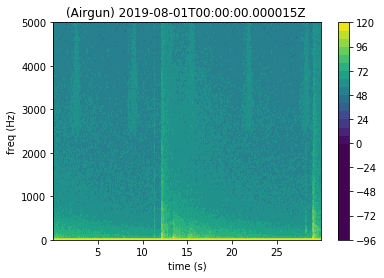

In [141]:
# 5 mins
#st9[0].plot()

# slicing to 1 second
t_start9 = st9[0].stats.starttime 
t_end9 = st9[0].stats.starttime + 10
sliced9 = st9.slice(t_start9, t_end9)
#sliced9.plot()

t_start9 = st9[0].stats.starttime + 10
t_end9 = st9[0].stats.starttime + 40
sliced9 = st9.slice(t_start9, t_end9)

npts9 = len(sliced9[0])
end9 = npts9 / fs9
nfft9 = int(fs9/16)  # number of fft points of each bin
print(nfft9)
per_lap9 = 0.90      # percentage of overlap
nlap9 = int(nfft9 * float(per_lap9))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram9, freq9, time9 = mlab.specgram(sliced9[0].data,NFFT = nfft9,Fs = fs9,noverlap = nlap9, pad_to = None)
specgram9 = 10 * np.log10(specgram9) +169-128.9
plt.contourf(time9,freq9,specgram9,30,vmin=0, vmax=120)
plt.title('(Airgun) 2019-08-01T00:00:00.000015Z ')
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)

### **Marine Mammals**

64000.0
4000


4000

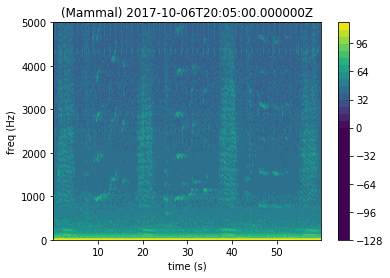

In [140]:
data_url_10='https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/06/OO-HYVM1--YDH-2017-10-06T20:00:00.000015.mseed'
st10 = read(data_url_10)
st10[0].stats

fs10 = st10[0].stats.sampling_rate
print(fs10)

# 5 mins from mseed
#st10[0].plot()

# slicing to time
t_start10 = st10[0].stats.starttime 
t_end10 = st10[0].stats.starttime + 60
sliced10 = st10.slice(t_start10, t_end10)
#sliced10.plot()

npts10 = len(sliced10[0])
end10 = npts10 / fs10
nfft10 = int(fs10/16)  # number of fft points of each bin
print(nfft10)
per_lap10 = 0.90      # percentage of overlap
nlap10 = int(nfft10 * float(per_lap10))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram10, freq10, time10 = mlab.specgram(sliced10[0].data,NFFT = nfft10,Fs = fs10,noverlap = nlap10, pad_to = None)
specgram10 = 10 * np.log10(specgram10) +169-128.9
plt.contourf(time10,freq10,specgram10,30,vmin=0, vmax=120)
plt.title('(Mammal) 2017-10-06T20:05:00.000000Z')
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,5000)
4000

### **Eartquake and Volcano**

64000.0
3200


(0, 150)

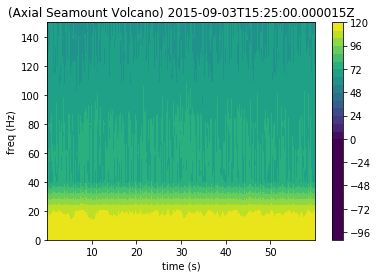

In [6]:
#Axial Seamount volcano on April 2015 (Only datea availabale is on Septemeber which probably lessen the effect detected but stills shows high frequency from the graph)
data_url_11='https://rawdata.oceanobservatories.org/files/RS03AXBS/LJ03A/09-HYDBBA302/2015/09/03/OO-AXVM1--YDH.2015-09-03T23:21:00.983563.mseed'
st11 = read(data_url_11)
st11[0].stats

fs11 = st11[0].stats.sampling_rate
print(fs11)

# slice time
t_start11 = st11[0].stats.starttime 
t_end11 = st11[0].stats.starttime + 60
sliced11 = st11.slice(t_start11, t_end11)
#sliced10.plot()

npts11 = len(sliced11[0])
end11 = npts11 / fs11
nfft11 = int(fs11/20)  # number of fft points of each bin
print(nfft11)
per_lap11 = 0.90      # percentage of overlap
nlap11 = int(nfft11 * float(per_lap11))   # number of overlapped samples

# using mlab to create the array of spectrogram 
specgram11, freq11, time11 = mlab.specgram(sliced11[0].data,NFFT = nfft11,Fs = fs11,noverlap = nlap11, pad_to = None)
specgram11 = 10 * np.log10(specgram11) +169-128.9
plt.contourf(time11,freq11,specgram11,30,vmin=0, vmax=120)
plt.title('(Axial Seamount Volcano) 2015-09-03T15:25:00.000015Z')
plt.xlabel('time (s)')
plt.ylabel('freq (Hz)')
plt.colorbar()
plt.ylim(0,150)